torch.Size([70000, 784])


<Figure size 640x480 with 0 Axes>

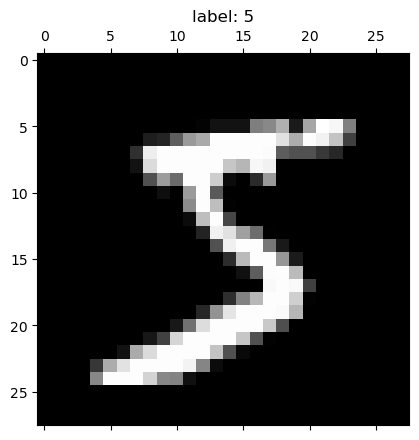

In [1]:
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits, fetch_openml

import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision as tv
import torchvision.transforms as transforms
from torch.autograd import Variable
from torchvision.utils import save_image

# Data Preprocessing

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
trainTransform  = tv.transforms.Compose([tv.transforms.ToTensor(), tv.transforms.Normalize((0.1307,), (0.3081,))])
trainset = tv.datasets.MNIST(root='./data',  train=True, download=True, transform=transform)
testset = tv.datasets.MNIST(root='./data',  train=False, download=True, transform=transform)

traindata = [i[0].reshape(-1) for i in trainset]
trainlabel = [i[1] for i in trainset]
testdata = [i[0].reshape(-1) for i in testset]
testlabel = [i[1] for i in testset]

X = traindata + testdata
y = trainlabel + testlabel

X = torch.vstack(X)
print(X.shape)

plt.gray()
plt.matshow(X[0].reshape(28,28))
plt.title("label: {}".format(y[0]))
plt.show()

In [8]:
class MM_I(nn.Module):
    def __init__(self, in_dim):
        super(MM_I, self).__init__()
        
        self.linear1 = nn.Linear(in_dim, in_dim)
        
    def forward(self, x):
        
        return x

In [9]:
model = MM_I(in_dim=784)

x = torch.ones((70000,784))
out = model(x)
out.shape

torch.Size([70000, 784])